In [1]:
import os
os.chdir('..')

In [2]:
from wisdom_tree import split_data, CART, plot_confusion_matrix, calculate_metrics, ordinal_encode, one_hot_encode
from nb_utils import display_side_by_side, print_metrics_report
import pandas as pd

In [ ]:
train_data = pd.read_csv('data/titanic/train.csv', sep=',')
X_test = pd.read_csv('data/titanic/test.csv', sep=',')
truth = pd.read_csv('data/titanic/truth.csv', sep=',')

age_median = train_data['Age'].median()
fare_median = train_data['Fare'].median()
embarked_mode = train_data['Embarked'].mode()[0]

train_data['Age'] = train_data['Age'].fillna(age_median)
X_test['Age'] = X_test['Age'].fillna(age_median)

train_data['Fare'] = train_data['Fare'].fillna(fare_median)
X_test['Fare'] = X_test['Fare'].fillna(fare_median)

train_data['Embarked'] = train_data['Embarked'].fillna(embarked_mode)
X_test['Embarked'] = X_test['Embarked'].fillna(embarked_mode)

train_data = train_data.join(one_hot_encode(train_data['Sex']))
X_test = X_test.join(one_hot_encode(X_test['Sex']))

embarked_order = ['S', 'C', 'Q']
train_data['Embarked'] = ordinal_encode(train_data['Embarked'], embarked_order)
X_test['Embarked'] = ordinal_encode(X_test['Embarked'], embarked_order)

cols_to_drop = ['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin']
train_data.drop(cols_to_drop, axis='columns', inplace=True)
X_test.drop(cols_to_drop, axis='columns', inplace=True)

y_test = truth['Survived'].astype(int)

train_data = train_data[[col for col in train_data.columns if col != 'Survived'] + ['Survived']]

In [17]:
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

display_side_by_side(X_train, y_train, names=['X', 'y'])
display_side_by_side(X_test, y_test, names=['X', 'y'])

In [6]:
arvere = CART().fit(X_train, y_train)
arvere.plot()

Split(Sex, ['male']), samples=891, samples_values=(549, 342)
├── in ['male']: Split(Age, 12.915), samples=577, samples_values=(468, 109)
│   ├── <= 12.91: Split(SibSp, 2.5), samples=37, samples_values=(16, 21)
│   │   ├── <= 2.50: Split(Parch, 0.5), samples=21, samples_values=(1, 20)
│   │   │   ├── <= 0.50: Split(Age, 11.5), samples=2, samples_values=(1, 1)
│   │   │   │   ├── <= 11.50: Predict(0), samples=1, samples_values=(1, 0)
│   │   │   │   └── > 11.50: Predict(1), samples=1, samples_values=(0, 1)
│   │   │   └── > 0.50: Predict(1), samples=19, samples_values=(0, 19)
│   │   └── > 2.50: Split(Parch, 1.5), samples=16, samples_values=(15, 1)
│   │       ├── <= 1.50: Predict(0), samples=8, samples_values=(8, 0)
│   │       └── > 1.50: Split(Age, 7.5), samples=8, samples_values=(7, 1)
│   │           ├── <= 7.50: Split(Age, 3.5), samples=4, samples_values=(3, 1)
│   │           │   ├── <= 3.50: Split(Age, 2.0), samples=2, samples_values=(1, 1)
│   │           │   │   ├── <= 2.00: Pr

In [7]:
predictions = arvere.predict(X_test)
predictions

[np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.in

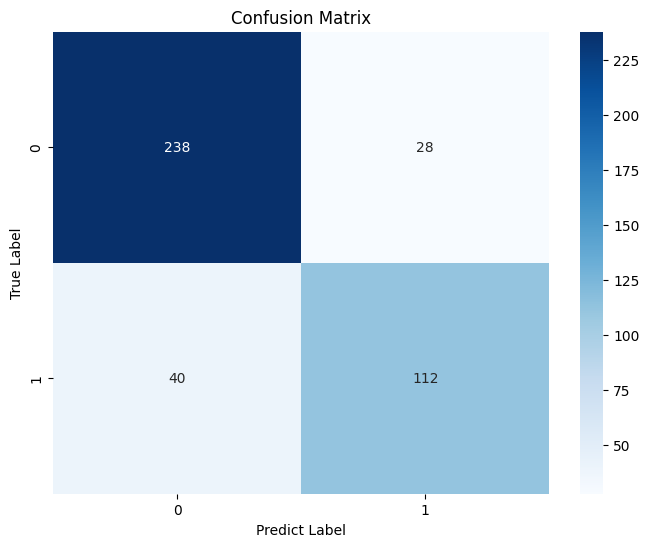

         Classification Report
Overall Accuracy: 0.8373

Class           Precision    Recall       F1-Score    
---------------------------------------------
0               0.8561       0.8947       0.8750      
1               0.8000       0.7368       0.7671      
---------------------------------------------
Macro Average   0.8281       0.8158       0.8211      


In [8]:
plot_confusion_matrix(y_test, predictions)
metrics = calculate_metrics(y_test, predictions)
print_metrics_report(metrics)